In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [135]:
LOWER_COLOR = np.array([20, 230, 60])
UPPER_COLOR = np.array([30, 255, 150])

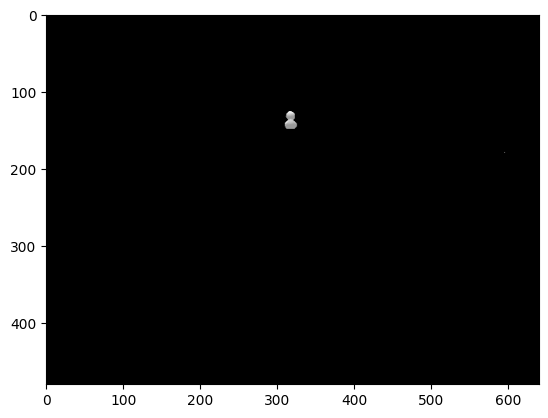

In [136]:
# Read the image
image = cv2.imread('./screen.png')

# Convert the image from BGR to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Threshold the HSV image to get only yellow colors
mask = cv2.inRange(hsv, LOWER_COLOR, UPPER_COLOR)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(image, image, mask=mask)

# Convert the resulting image to grayscale
gray = cv2.cvtColor(res, cv2.COLOR_BGR2GRAY)

# Display the grayscale image with matplotlib
plt.imshow(gray, cmap='gray')

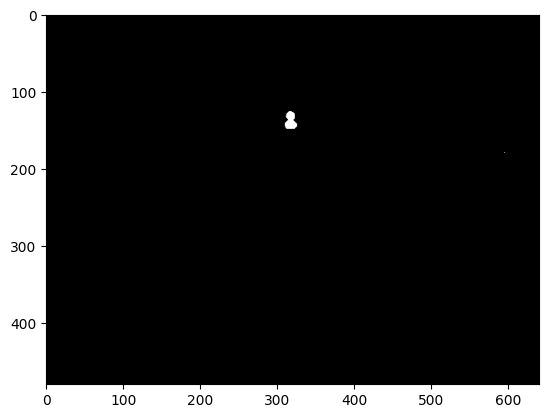

In [137]:
# Apply thresholding to get a binary image
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the grayscale image with matplotlib
plt.imshow(thresh, cmap='gray')

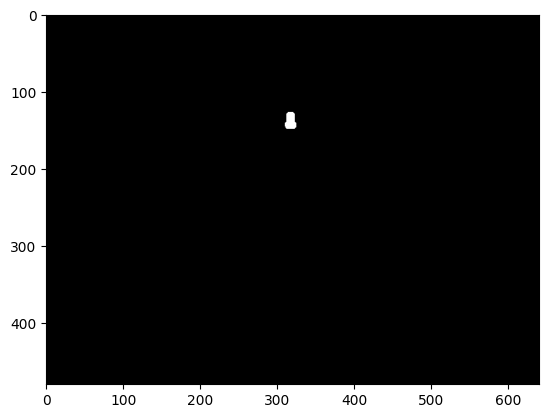

In [138]:
# Apply morphological operations to remove noise
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

# Display the grayscale image with matplotlib
plt.imshow(closing, cmap='gray')

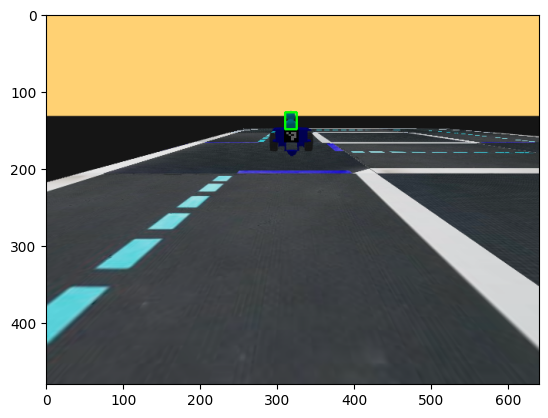

In [139]:
# Find contours of the filtered areas
contours, _ = cv2.findContours(closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw bounding boxes around the detected areas
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

# Display the image with matplotlib
plt.imshow(image)